### 시각화
1. 열에 대한 시각화
  - 의미가 있는 feature 선택
2. 지역별 view_cnt 시각화
3. 참여 시 어려움, 연령/성별 비교
4. 범주형 feature의 카테고리로 view_cnt를 나눠서 시각화

In [1]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
import seaborn as sns
%matplotlib inline 

In [3]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [5]:
import platform
from matplotlib import font_manager, rc

# 한글 사용시 마이너스 폰트가 깨지는 문제가 발생할 수 있으므로 설정변경
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~~~')

### 데이터 로드

In [6]:
CS =  pd.read_csv('../data/CS.csv', encoding='EUC-KR')

In [7]:
CS.head(1)

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1


In [8]:
CS.shape

(20624, 24)

### 각 열에 대해 시각화

#### 범주형 변수

#### sex
- 여자가 남자보다 근소한 차이로 많음

In [9]:
sex_cnt = CS['sex'].value_counts().sort_index().to_frame()
sex_cnt

,sex
1,10254
2,10370


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'sex')

([<matplotlib.axis.YTick at 0x27de2041ba8>,
 <a list of 2 Text yticklabel objects>)

<BarContainer object of 2 artists>

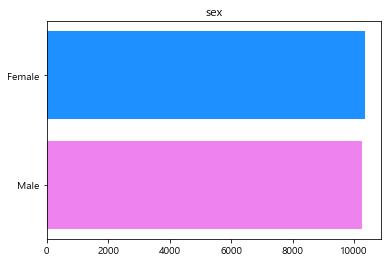

In [10]:
# 시각화 - barh
plt.figure(figsize=(6,4))

s = ['Male', 'Female']
y = np.arange(2)

plt.title('sex')
plt.yticks(y, s)
plt.barh(y, sex_cnt['sex'], color=['violet','dodgerblue'])


#### age

**연령대별 가장 많이 분포되어 있는 층**  
**1. 50대**  
**2. 40대**  
**3. 30대**

In [11]:
age_cnt = CS['age'].value_counts().sort_index().to_frame()
age_cnt

,age
1,1369
2,3054
3,3206
4,3834
5,3956
6,2771
7,2434


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age')

([<matplotlib.axis.YTick at 0x27de20e3358>,
 <a list of 7 Text yticklabel objects>)

<BarContainer object of 7 artists>

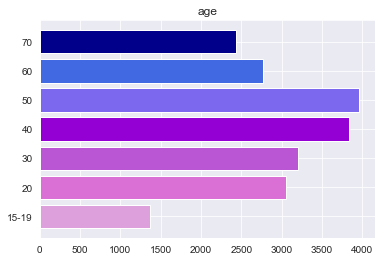

In [12]:
# 시각화 - barh
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))

a = ['15-19', '20', '30', '40', '50', '60', '70']
y = np.arange(7)

plt.title('age')
plt.yticks(y, a)
plt.barh(y, age_cnt['age'], color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])

#### education
1. 초졸 이하
2. 중졸
3. 고졸
4. 대졸 이상

**고졸, 대졸 이상 순으로 많음**  
**=> 일반적으로 봤을 때, 연령대가 높은 층이 문화예술참여가 더 높을 것으로 생각됨**

In [13]:
edu_cnt = CS['education'].value_counts().sort_index().to_frame()
edu_cnt

,education
1,2151
2,2548
3,8426
4,7499


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'education')

([<matplotlib.axis.XTick at 0x27de21354e0>,
 <a list of 4 Text xticklabel objects>)

<BarContainer object of 4 artists>

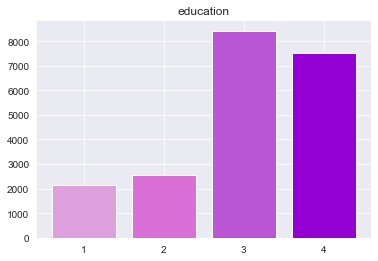

In [14]:
# 시각화 - education
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))


plt.title('education')
plt.xticks(edu_cnt.index)
plt.bar(edu_cnt.index,edu_cnt['education'], color=['plum','orchid','mediumorchid','darkviolet'])

#### married
1. 미혼
2. 기혼
3. 사별/이혼

**=> "기혼"이 제일 많음**

In [15]:
married_cnt = CS['married'].value_counts().sort_index().to_frame()
married_cnt

,married
1,6099
2,11972
3,2553


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'married')

([<matplotlib.axis.XTick at 0x27de21c76a0>,
 <a list of 3 Text xticklabel objects>)

<BarContainer object of 3 artists>

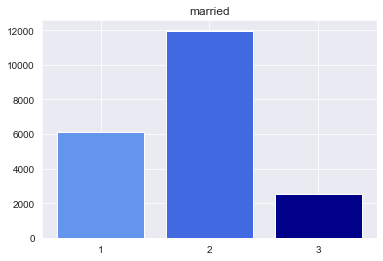

In [16]:
# 시각화 - married
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))


plt.title('married')
plt.xticks(married_cnt.index)
plt.bar(married_cnt.index,married_cnt['married'], color=['cornflowerblue','royalblue', 'darkblue'])

#### work
1. 임금, 봉급 근로자
2. 고용원을 둔 사업자
3. 고용원이 없는 자영자
4. 무급가족종사자
5. 해당없음(무직)


**1위 임금, 봉급 근로자 => 경제적여유가 있는 사람**  
**2위 해당없음(무직) => 시간적여유가 있는 사람**  
**3위 고용원이 없는 자영자 => 시간적여유 & 경제적여유가 있는사람**  

In [17]:
work_cnt = CS['work'].value_counts().sort_index().to_frame()
work_cnt

,work
1,8720
2,596
3,3540
4,406
5,7362


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'work')

([<matplotlib.axis.XTick at 0x27de892bef0>,
 <a list of 5 Text xticklabel objects>)

<BarContainer object of 5 artists>

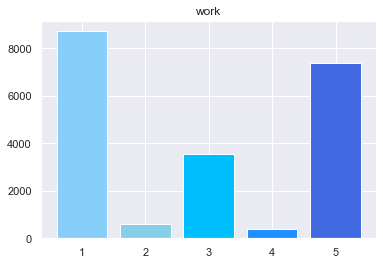

In [82]:
# 시각화 - work
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))


plt.title('work')
plt.xticks(work_cnt.index)
plt.bar(work_cnt.index,work_cnt['work'], color=['lightskyblue','skyblue', 'deepskyblue', 'dodgerblue', 'royalblue'])

#### income
1. 100만원 미만
2. 100-200만원
3. 200-300만원
4. 300-400만원
5. 400-500만원
6. 500-600만원
7. 600만원 이상


**1. 300-400만원**  
**2. 400-500만원**  
**3. 200-300만원**  

In [19]:
income_cnt = CS['income'].value_counts().sort_index().to_frame()
income_cnt

,income
1,1791
2,2168
3,3463
4,4232
5,4059
6,3148
7,1763


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'income')

([<matplotlib.axis.XTick at 0x27de2281278>,
 <a list of 7 Text xticklabel objects>)

<BarContainer object of 7 artists>

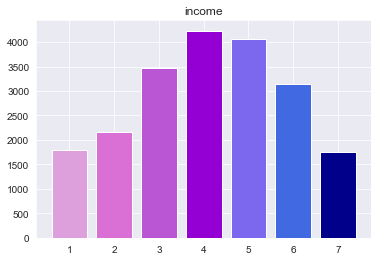

In [20]:
# 시각화 - income
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))


plt.title('income')
plt.xticks(income_cnt.index)
plt.bar(income_cnt.index,income_cnt['income'], color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])

#### sido
1. 서울
2. 부산
3. 대구
4. 인천
5. 광주
6. 대전
7. 울산
8. 세종
9. 경기
10. 강원
11. 충북
12. 충남
13. 전북
14. 전남
15. 경북
16. 경남
17. 제주

**경기(1위), 서울(2위), 부산(3위)순으로 많은 것을 볼 수 있음**

In [21]:
sido_cnt = CS['sido'].value_counts().sort_index().to_frame()
sido_cnt['sido_code'] = sido_cnt.index
sido_cnt

,sido,sido_code
1,3150,1
2,1445,2
3,1123,3
4,1195,4
5,772,5
6,792,6
7,643,7
8,253,8
9,3736,9
10,795,10


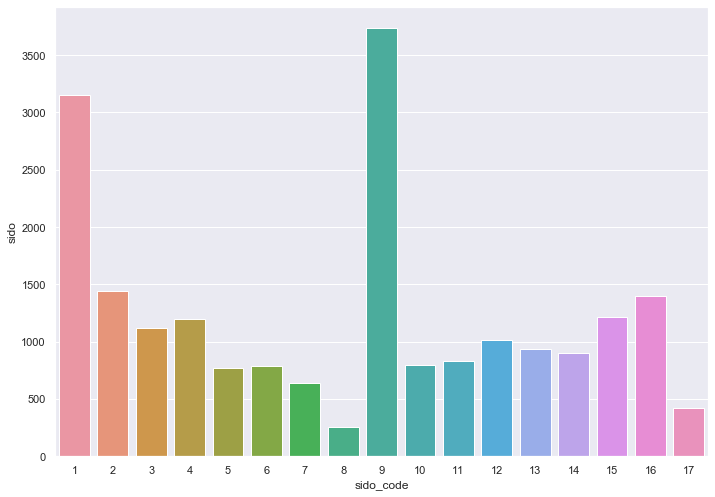

In [22]:
# 시각화 - sido
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= sido_cnt,
    x= "sido_code",
    y= "sido"
)

#### disabled
1. 해당사항없음
2. 미등록
3. 장애등록

**해당사항없음에 응답한 사람이 가장 많음**

In [23]:
disabled_cnt = CS['disabled'].value_counts().sort_index().to_frame()
disabled_cnt['disabled_code'] = disabled_cnt.index
disabled_cnt

,disabled,disabled_code
1,19772,1
2,532,2
3,320,3


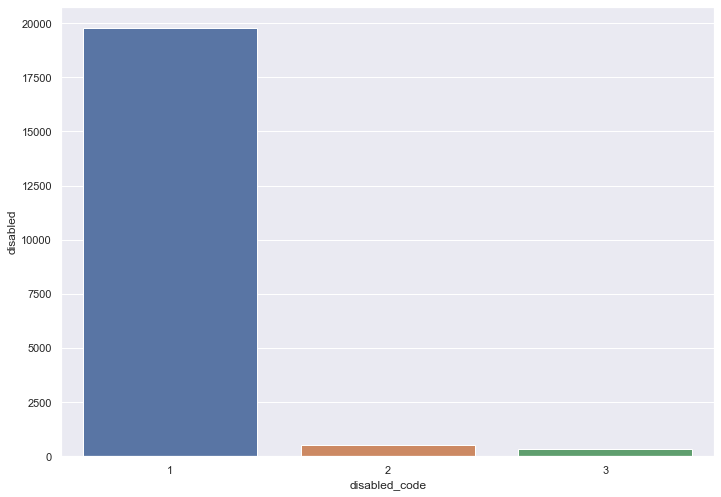

In [24]:
# 시각화 - disabled
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= disabled_cnt,
    x= "disabled_code",
    y= "disabled"
)

#### standard

1. 문화예술행사의 내용 및 수준
2. 관람 비용의 적절성
3. 참가자(작가, 출연진)의 유명도
4. 행사개최 장소의 유명도
5. 교통의 편의성
6. 편의시설 구비여부(놀이방 등)
7. 문화예술행사에 대한 전문가 의견, 언론보도
8. 문화예술행사에 대한 주위 의견, 네티즌 의견
9. 접근성(가깝다)

**1. 문화예술행사의 내용 및 수준**  
**2. 관람 비용의 적절성**  
**3. 접근성(가깝다)**  

In [25]:
standard_cnt = CS['standard'].value_counts().sort_index().to_frame()
standard_cnt['standard_code'] = standard_cnt.index
standard_cnt

,standard,standard_code
1,6542,1
2,5412,2
3,2036,3
4,866,4
5,2167,5
6,441,6
7,470,7
8,428,8
9,2233,9
10,29,10


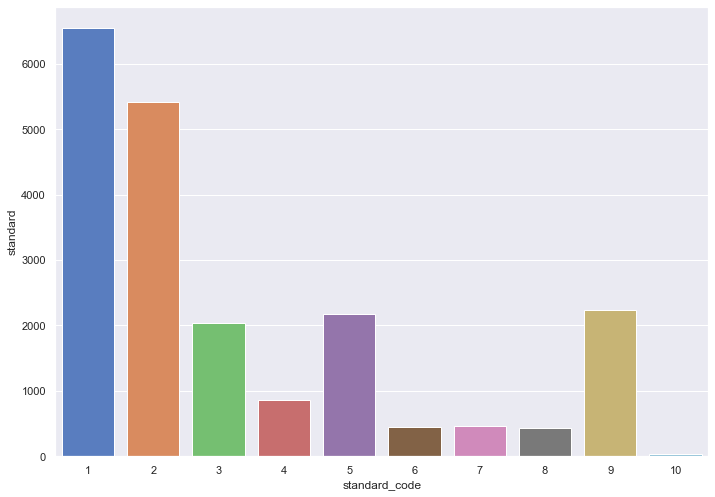

In [26]:
# 시각화 - standard
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("muted")
sns.barplot(
    data= standard_cnt,
    x= "standard_code",
    y= "standard"
)

####  block

1. 비용이 많이 든다
2. 시간이 좀처럼 나지 않는다
3. 관심 있는 프로그램이 없다
4. 교통이 불편하다
5. 편의시설(놀이방 등)이 불편하다
6. 관련정보가 부족하다
7. 함께 관람할 사람이 없다
8. 가까운 곳에 시설이 없다
9. 기타


**1. 시간이 좀처럼 나지 않는다**  
**2. 비용이 많이 든다**  
**3. 관심 있는 프로그램이 없다**  


In [27]:
block_cnt = CS['block'].value_counts().sort_index().to_frame()
block_cnt['block_code'] = block_cnt.index
block_cnt

,block,block_code
1,5401,1
2,5738,2
3,3468,3
4,1277,4
5,568,5
6,2087,6
7,527,7
8,1476,8
9,82,9


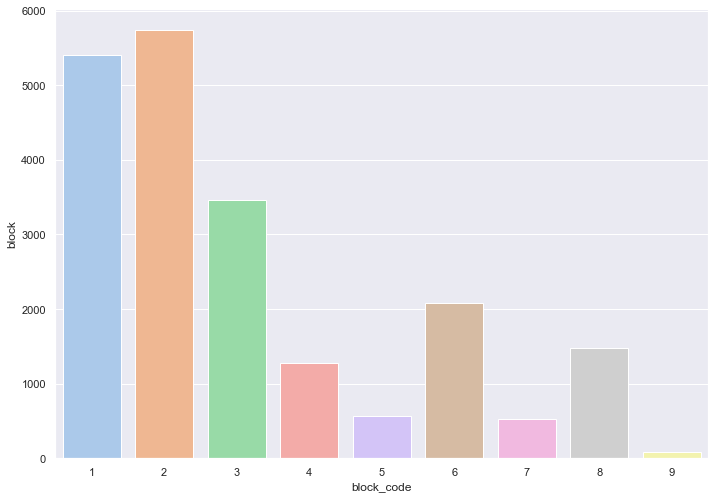

In [28]:
# 시각화 - block
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= block_cnt,
    x= "block_code",
    y= "block"
)

#### expense

**14. 관람-연극(뮤지컬)**  
**17. 기타-예술**  
**7. 구입대여-연극(뮤지컬)**  

In [29]:
expense_cnt = CS['expense'].value_counts().sort_index().to_frame()
expense_cnt['expense_code'] = expense_cnt.index
expense_cnt

,expense,expense_code
1,706,1
2,89,2
3,45,3
4,65,4
5,85,5
6,49,6
7,1525,7
8,560,8
9,238,9
10,87,10


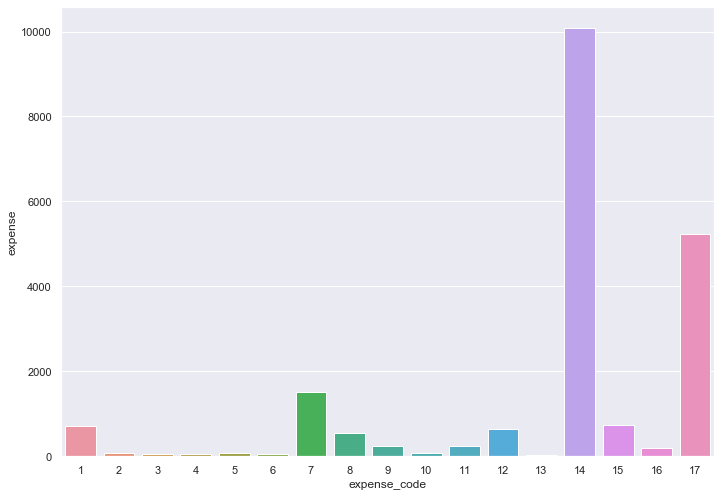

In [30]:
# 시각화 - expense
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(
    data= expense_cnt,
    x= "expense_code",
    y= "expense"
)

#### expense_f

**14. 관람-연극(뮤지컬)**  
**15. 관람-무용(서양무욕,한국무용,현대무용)**  
**12. 관람-전통예술(국악, 풍물, 민속극)**

In [31]:
expense_f_cnt = CS['expense_f'].value_counts().sort_index().to_frame()
expense_f_cnt['expense_f_code'] = expense_f_cnt.index
expense_f_cnt

,expense_f,expense_f_code
1,876,1
2,129,2
3,77,3
4,135,4
5,253,5
6,106,6
7,1027,7
8,570,8
9,745,9
10,297,10


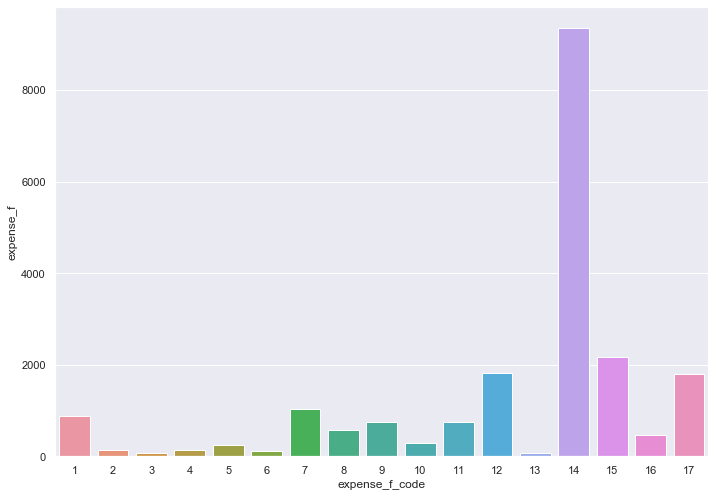

In [32]:
# 시각화 - expense_f
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(
    data= expense_f_cnt,
    x= "expense_f_code",
    y= "expense_f"
)

#### difficulty
1. 비용이 많이 든다
2. 시간이 좀처럼 나지 않는다
3. 관심 있는 프로그램이 없다
4. 교통이 불편하다
5. 시설(편의시설)이 불편하다
6. 관련정보가 부족하다
7. 함께 갈 사람이 없다
8. 주변에 이용 공간이 없다
9. 기타

**1. 시간이 좀처럼 나지 않는다**  
**2. 관심 있는 프로그램이 없다**  
**3. 비용이 많이 든다**  

In [33]:
difficulty_cnt = CS['difficulty'].value_counts().sort_index().to_frame()
difficulty_cnt['difficulty_code'] = difficulty_cnt.index
difficulty_cnt

,difficulty,difficulty_code
1,3511,1
2,6209,2
3,4408,3
4,1030,4
5,623,5
6,2977,6
7,600,7
8,1189,8
9,77,9


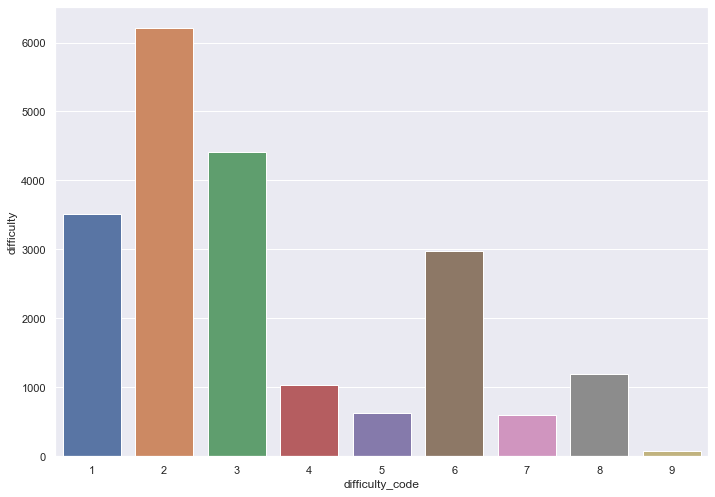

In [34]:
# 시각화 - difficulty
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(
    data= difficulty_cnt,
    x= "difficulty_code",
    y= "difficulty"
)

#### intention

1. 있다
2. 없다

In [35]:
intention_cnt = CS['intention'].value_counts().sort_index().to_frame()
intention_cnt['intention_code'] = intention_cnt.index
intention_cnt

,intention,intention_code
1,10661,1
2,9963,2


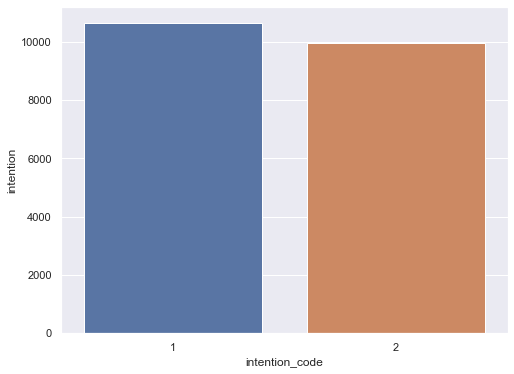

In [36]:
# 시각화 - intention
sns.set(rc={'figure.figsize':(8,6)})


sns.barplot(
    data= intention_cnt,
    x= "intention_code",
    y= "intention"
)

#### history

1. 가본 적이 있다
2. 가본 적이 없다

In [37]:
history_cnt = CS['history'].value_counts().sort_index().to_frame()
history_cnt['history_code'] = history_cnt.index
history_cnt

,history,history_code
1,9705,1
2,10919,2


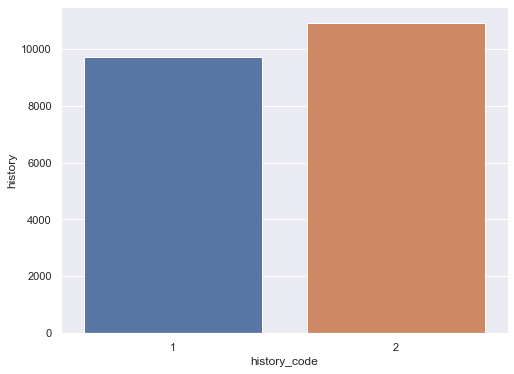

In [38]:
# 시각화 - history
sns.set(rc={'figure.figsize':(8,6)})


sns.barplot(
    data= history_cnt,
    x= "history_code",
    y= "history"
)

#### history_f

**5 > 6 > 4**

In [39]:
history_f_cnt = CS['history_f'].value_counts().sort_index().to_frame()
history_f_cnt['history_f_code'] = history_f_cnt.index
history_f_cnt

,history_f,history_f_code
1,402,1
2,421,2
3,823,3
4,4929,4
5,6874,5
6,5685,6
7,1490,7


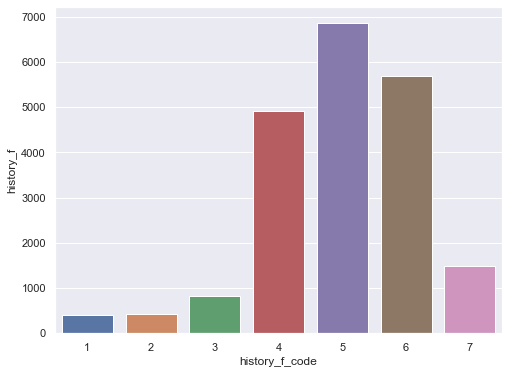

In [40]:
# 시각화 - history_f
sns.set(rc={'figure.figsize':(8,6)})


sns.barplot(
    data= history_f_cnt,
    x= "history_f_code",
    y= "history_f"
)

#### festival

In [41]:
festival_cnt = CS['festival'].value_counts().sort_index().to_frame()
festival_cnt['festival_code'] = festival_cnt.index
festival_cnt

,festival,festival_code
1,9852,1
2,10772,2


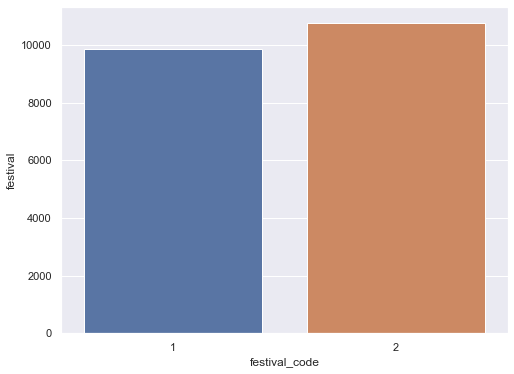

In [42]:
# 시각화 - festival
sns.set(rc={'figure.figsize':(8,6)})


sns.barplot(
    data= festival_cnt,
    x= "festival_code",
    y= "festival"
)

#### festival_f

In [43]:
festival_f_cnt = CS['festival_f'].value_counts().sort_index().to_frame()
festival_f_cnt['festival_f_code'] = festival_f_cnt.index
festival_f_cnt

,festival_f,festival_f_code
1,341,1
2,432,2
3,778,3
4,4637,4
5,7041,5
6,5918,6
7,1477,7


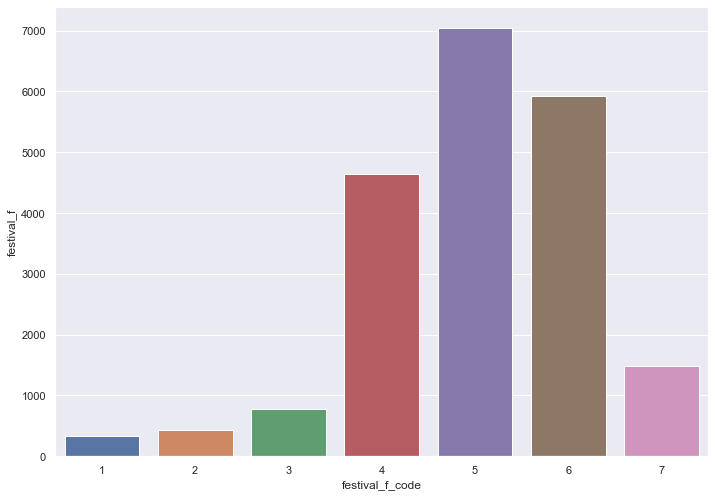

In [44]:
# 시각화 - festival_F
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(
    data= festival_f_cnt,
    x= "festival_f_code",
    y= "festival_f"
)

### 지역별 view_cnt 시각화

- 지역별 view_cnt는 sido 코드값 9(경기도)에 해당하는 지역이 가장 높은것으로 나타남
- 그 다음으로는 1(서울) 3(대구)가 높은 것으로 확인

In [45]:
# 지역별 view_cnt 횟수
view_cnt_by_sido = CS.groupby(['sido'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
view_cnt_by_sido

,sido,view_cnt
0,1,66438
1,2,40333
2,3,40937
3,4,24335
4,5,14370
5,6,22738
6,7,19424
7,8,6647
8,9,81584
9,10,13336


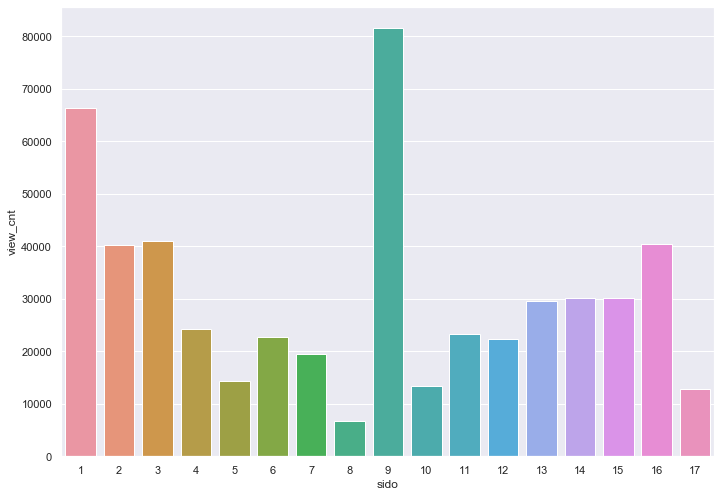

In [46]:
# 시각화 - 지역별 관람 횟수
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= view_cnt_by_sido,
    x= "sido",
    y= "view_cnt"
)

### 수도권과 그 외의 지역에 대한 view_cnt 시각화
- 수도권 / 그 외의 지역에 대해 차이가 있음
- 수도권이 2배 정도 높게 나타남

In [47]:
# 수도권, 그 외의 지역의 비율
p1 = CS[(CS.sido==1) | (CS.sido==9)] # 수도권
p2 = CS[(CS.sido!=1) & (CS.sido!=9)] # 그 외의 지역

sido_sudo = view_cnt_by_sido[(view_cnt_by_sido.sido == 1 ) |  (view_cnt_by_sido.sido == 9) ]['view_cnt'].sum() # 수도권
sido_etc = view_cnt_by_sido[(view_cnt_by_sido.sido != 1 ) | (view_cnt_by_sido.sido != 9) ]['view_cnt'].sum() # 그 외의 지역

view_cnt_list = [sido_sudo/len(p1), sido_sudo/len(p2)]
view_cnt_list

[21.496079000871333, 10.774639685543747]

In [48]:
sido_etc = pd.DataFrame({'sido' : ['sudo', 'etc'],
                    'view_cnt' : view_cnt_list})
sido_etc

,sido,view_cnt
0,sudo,21.496079
1,etc,10.774640


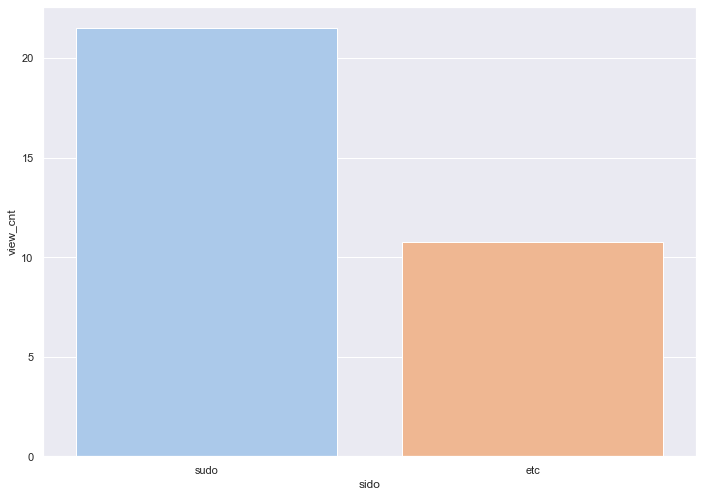

In [49]:
# 시각화 - 연령별 합쳤을 때 시각화
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= sido_etc,
    x= "sido",
    y= "view_cnt"
)

### 참여 시 어려움, 연령/성별 비교

### 연령

In [50]:
CS[['age', 'difficulty']]

,age,difficulty
0,5,3
1,5,1
2,2,1
3,4,4
4,3,4
...,...,...
20619,4,6
20620,3,2
20621,5,2
20622,4,2


#### 연령별 참여시 어려움을 느끼고 있는 정도

- 50대가 어려움을 느끼고 있는 정도가 큰 것을 알 수 있음
- 그 다음으로는 40대, 30대가 어려움을 느끼고 있음

In [51]:
# 연령별 참여시 어려움 느끼고 있다에 체크한 정도
difficulty_by_age = CS.groupby(['age'], as_index=False)['difficulty'].count()
difficulty_by_age

,age,difficulty
0,1,1369
1,2,3054
2,3,3206
3,4,3834
4,5,3956
5,6,2771
6,7,2434


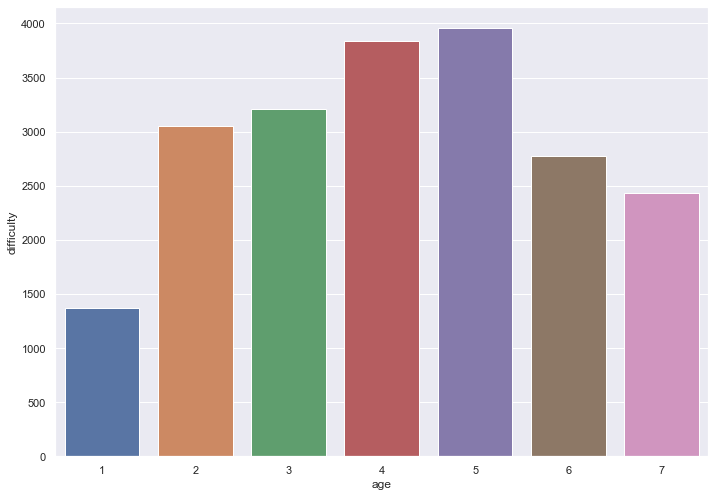

In [52]:
# 시각화 - 연령별 어려움을 느끼는 정도
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= difficulty_by_age,
    x= "age",
    y= "difficulty"
)

#### 각 연령대별 참여시 어려움에 대한 분포 알아보기
- 50대 2번(시간이 좀처럼 나지 않는다) > 3번(관심 있는 프로그램이 없다) > 1번(비용이 많이 든다)
- 60대 2번(시간이 좀처럼 나지 않는다) >  3번(관심 있는 프로그램이 없다) > 1번(비용이 많이 든다)

위같은 항목에서 가장 어려움을 느끼고 있음  
시간이 좀처럼 나지 않는 사람들을 위해 어떻게 해야 할까 ?

In [53]:
# 각 연령별 어려움을 느끼고 있는 정도 분포 어려움 1~9
CS['difficulty'].unique()

array([3, 1, 4, 5, 2, 6, 8, 7, 9], dtype=int64)

In [54]:
# 연령별 참여시 어려움 분포값
diff_gp1 = CS[CS['age'] == 1]['difficulty'].value_counts().to_frame().sort_index()
diff_gp2 = CS[CS['age'] == 2]['difficulty'].value_counts().to_frame().sort_index()
diff_gp3 = CS[CS['age'] == 3]['difficulty'].value_counts().to_frame().sort_index()
diff_gp4 = CS[CS['age'] == 4]['difficulty'].value_counts().to_frame().sort_index()
diff_gp5 = CS[CS['age'] == 5]['difficulty'].value_counts().to_frame().sort_index()
diff_gp6 = CS[CS['age'] == 6]['difficulty'].value_counts().to_frame().sort_index()
diff_gp7 = CS[CS['age'] == 7]['difficulty'].value_counts().to_frame().sort_index()
diff_gp8 = CS[CS['age'] == 8]['difficulty'].value_counts().to_frame().sort_index()
diff_gp9 = CS[CS['age'] == 9]['difficulty'].value_counts().to_frame().sort_index()

<Figure size 1296x1152 with 0 Axes>

Text(0.5, 1.0, 'age : 15-19')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de68e89b0>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 20')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de6c9bda0>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 30')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de710b048>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 40')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de71695c0>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 50')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de71bfa20>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 60')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de721deb8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'age : 70-')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de7264240>,
 <a list of 9 Text xticklabel objects>)

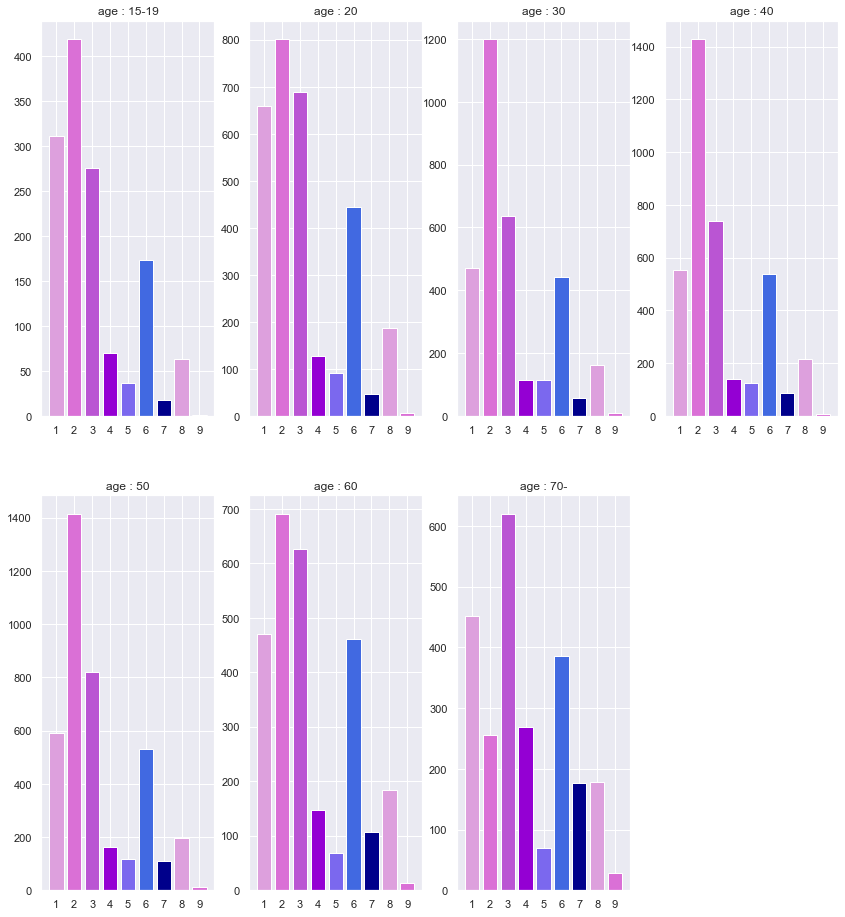

In [55]:
# 시각화 - subplot 2행 5열

diff = [_ for _ in range(1,10)]

plt.figure(figsize=(18,16))

plt.subplot(251)
plt.title('age : 15-19')
plt.bar(diff, diff_gp1['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(252)
plt.title('age : 20')
plt.bar(diff, diff_gp2['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(253)
plt.title('age : 30')
plt.bar(diff,diff_gp3['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(254)
plt.title('age : 40')
plt.bar(diff,diff_gp4['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(256)
plt.title('age : 50')
plt.bar(diff,diff_gp5['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(257)
plt.title('age : 60')
plt.bar(diff,diff_gp6['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(258)
plt.title('age : 70-')
plt.bar(diff,diff_gp7['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)


### 성별

In [56]:
CS[['sex', 'difficulty']]

,sex,difficulty
0,2,3
1,2,1
2,1,1
3,2,4
4,2,4
...,...,...
20619,2,6
20620,2,2
20621,1,2
20622,2,2


#### 성별 참여시 어려움을 느끼고 있는 정도
- 여자가 조금 더 어려움을 느끼고 있음

In [57]:
difficulty_by_sex = CS.groupby(['sex'], as_index=False)['difficulty'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
difficulty_by_sex

,sex,difficulty
0,1,33389
1,2,35266


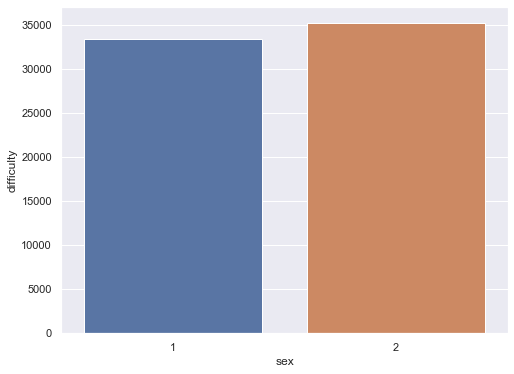

In [58]:
# 시각화 - 성별 참여시 어려움을 느끼고 있는 정도
sns.set(rc={'figure.figsize':(8,6)})

sns.barplot(
    data= difficulty_by_sex,
    x= "sex",
    y= "difficulty"
)

#### 성별로 참여시 어려움에 대한 분포 알아보기
- 남녀 모두 2번(시간이 좀처럼 나지 않는다) > 3번(관심 있는 프로그램이 없다) > 1번(비용이 많이 든다) 순으로 어려움을 느끼고 있음

In [59]:
# 연령별 참여시 어려움 분포값
diff_sex_gp1 = CS[CS['sex'] == 1]['difficulty'].value_counts().to_frame().sort_index()
diff_sex_gp2 = CS[CS['sex'] == 2]['difficulty'].value_counts().to_frame().sort_index()

In [60]:
# diff_sex_gp2

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Male')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de75faa90>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Female')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x27de72bfd30>,
 <a list of 9 Text xticklabel objects>)

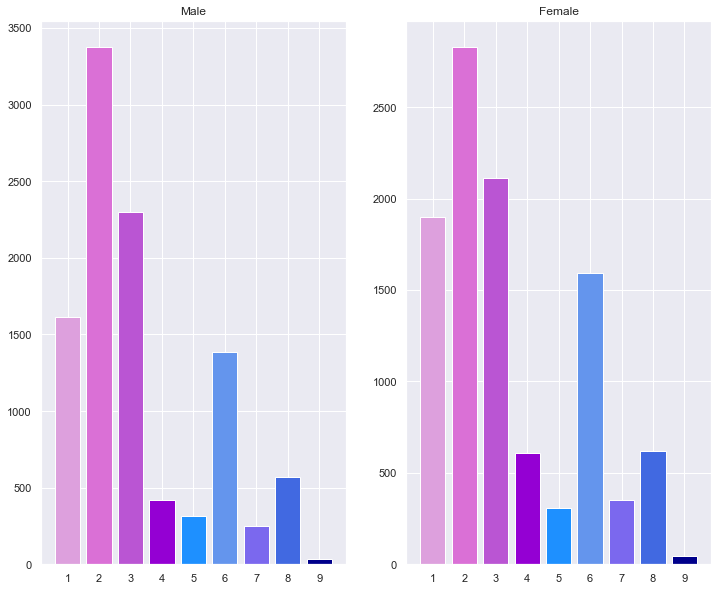

In [61]:
# 시각화 - subplot 1행 2열

diff = [_ for _ in range(1,10)]

plt.figure(figsize=(12,10))

plt.subplot(121)
plt.title('Male')
plt.bar(diff, diff_sex_gp1['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','dodgerblue','cornflowerblue','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)

plt.subplot(122)
plt.title('Female')
plt.bar(diff, diff_sex_gp2['difficulty'],color=['plum','orchid','mediumorchid','darkviolet','dodgerblue','cornflowerblue','mediumslateblue','royalblue','darkblue'])
plt.xticks(diff)


### 범주형 feature의 카테고리로 view_cnt를 나눠서 시각화

#### 연령대별 따른 view_cnt
- 20-30대, 40-50대, 60-70대의 분포가 비슷함을 알 수 있다

In [90]:
# 연령대별 view cnt (시니어들의 관람횟수 확인)
age_by_view_cnt = CS.groupby(['age'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
age_by_view_cnt

,age,view_cnt
0,1,33726
1,2,81131
2,3,85434
3,4,98233
4,5,95604
5,6,65402
6,7,59339


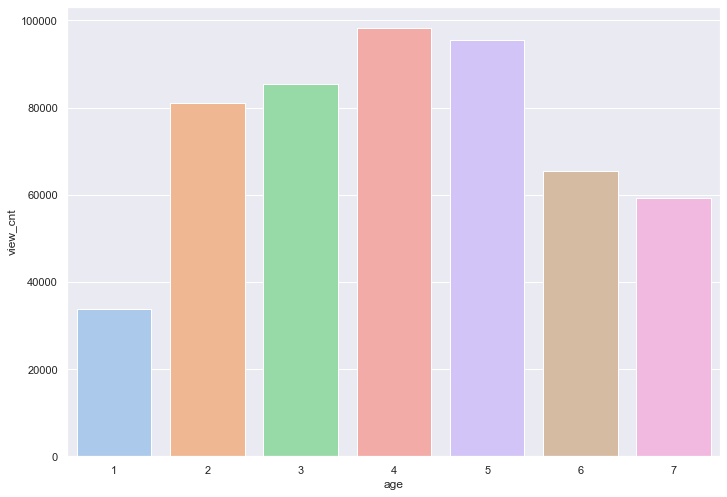

In [63]:
# 시각화 - 연령별 view_cnt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= age_by_view_cnt,
    x= "age",
    y= "view_cnt"
)

In [64]:
# 각 연령대 별 비율
p1 = CS[(CS.age==1) | (CS.age==2)]
p2 = CS[(CS.age==3) | (CS.age==4)]
p3 = CS[(CS.age==5) | (CS.age==6)]
p4 = CS[(CS.age==7)]


age1 = age_by_view_cnt[(age_by_view_cnt.age == 1 ) |  (age_by_view_cnt.age == 2) ]['view_cnt'].sum() # 10 & 20
age2 = age_by_view_cnt[(age_by_view_cnt.age == 3 ) | (age_by_view_cnt.age == 4) ]['view_cnt'].sum() # 30 & 40
age3 = age_by_view_cnt[(age_by_view_cnt.age == 5 ) | (age_by_view_cnt.age == 6) ]['view_cnt'].sum() # 50 & 60 : 시니어
age4 = age_by_view_cnt[(age_by_view_cnt.age == 7 )]['view_cnt'].sum() # 70

view_cnt_list = [age1/len(p1), age2/len(p2), age3/len(p3), age4/len(p4)]
view_cnt_list

[25.968121184716257, 26.0890625, 23.934294633566225, 24.379211175020544]

In [98]:
per_age_view_cnt = pd.DataFrame({'age' : ['10-20','30-40','50-60','70'],
                    'view_cnt' : view_cnt_list})
per_age_view_cnt

,age,view_cnt
0,10-20,25.968121
1,30-40,26.089063
2,50-60,23.934295
3,70,24.379211


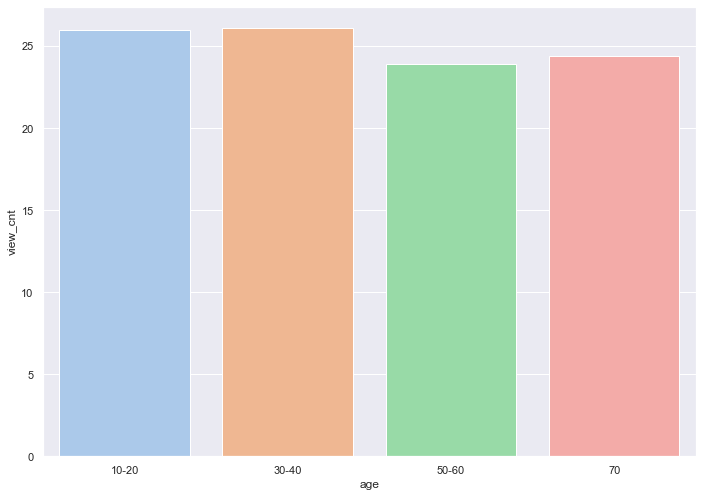

In [99]:
# 시각화 - 연령별 합쳤을 때 시각화
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= per_age_view_cnt,
    x= "age",
    y= "view_cnt"
)

#### boxplot
- target log화
- 연령별 boxplot

In [93]:
log_view_cnt = list(np.log1p(age_by_view_cnt['view_cnt']))
log_view_cnt

[10.426053982505138,
 11.303832736878679,
 11.355511131882373,
 11.495107666597255,
 11.46798039892706,
 11.088323407952855,
 10.991038893844813]

In [94]:
log_age_view_cnt = pd.DataFrame({'age' : ['15-19','20','30','40', '50', '60','70'],
                    'view_cnt' : log_view_cnt})
log_age_view_cnt

,age,view_cnt
0,15-19,10.426054
1,20,11.303833
2,30,11.355511
3,40,11.495108
4,50,11.467980
5,60,11.088323
6,70,10.991039


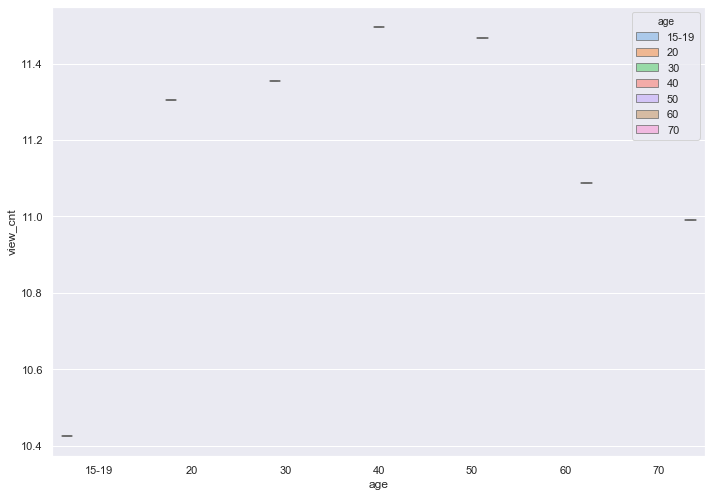

In [95]:
# boxplot
sns.boxplot(x = "age", y = "view_cnt", hue="age", data = log_age_view_cnt)

#### 각 연령대별(비율) boxplot

In [100]:
per_age_view_cnt['view_cnt'] = np.log1p(per_age_view_cnt['view_cnt'])
per_age_view_cnt

,age,view_cnt
0,10-20,3.294655
1,30-40,3.299130
2,50-60,3.216244
3,70,3.233930


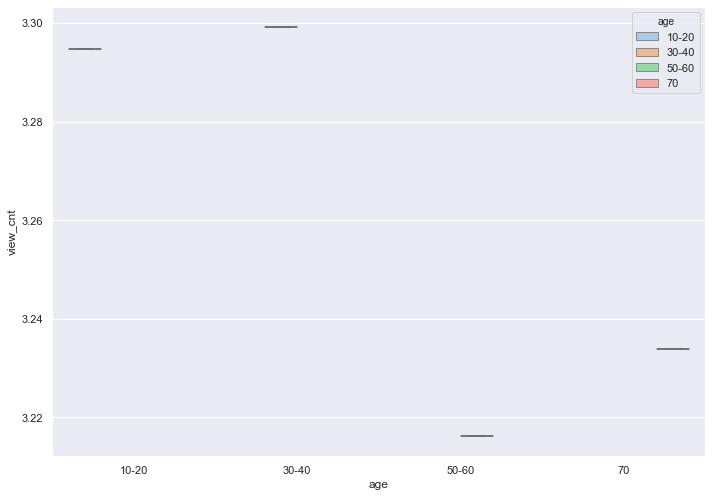

In [101]:
# boxplot
sns.boxplot(x = "age", y = "view_cnt", hue="age", data = per_age_view_cnt)

#### 학력 수준에 따른 view_cnt

- 학력 수준 4 : 대졸 이상, 3 : 고졸이 관람 횟수가 가장 높은 것으로 나타났음
- 초졸 이하와 중졸은 관람 횟수가 많이 차이 나지 않는 것을 확인할 수 있음

In [67]:
# 학력 수준에 따른 view cnt
education_by_view_cnt = CS.groupby(['education'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
education_by_view_cnt

,education,view_cnt
0,1,60130
1,2,57304
2,3,199269
3,4,202166


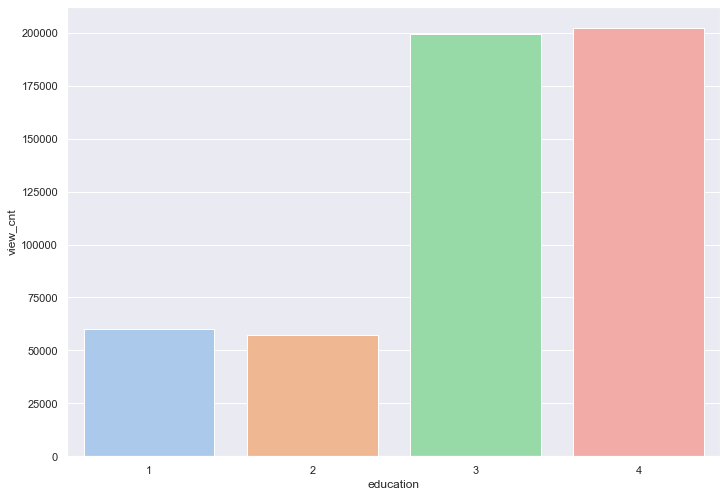

In [68]:
# 시각화 - 학력 수준에 따른 view_cnt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= education_by_view_cnt,
    x= "education",
    y= "view_cnt"
)

#### 혼인상태에 따른 view_cnt

- 기혼인 사람들이 관람횟수가 가장 높게 나타났고, 그 다음으로는 미혼이 높게 나타났음
- 사별/이혼이 가장 적게 나타났음

In [69]:
# 혼인상태에 따른 view cnt
married_by_view_cnt = CS.groupby(['married'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
married_by_view_cnt

,married,view_cnt
0,1,163822
1,2,291944
2,3,63103


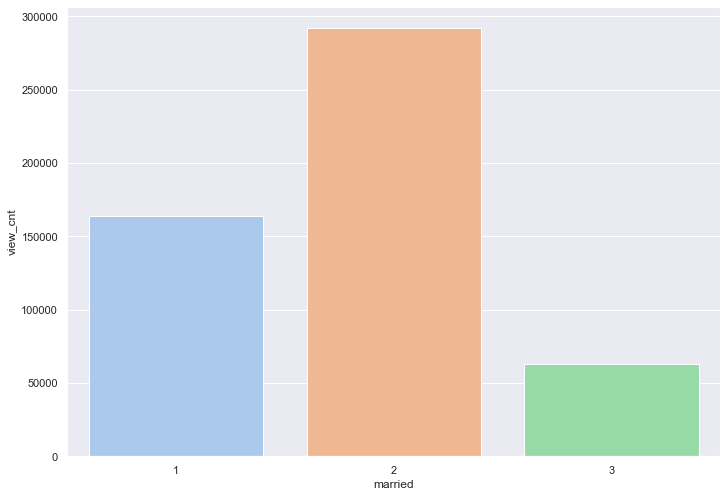

In [70]:
# 시각화 - 혼인상태에 따른 view_cnt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= married_by_view_cnt,
    x= "married",
    y= "view_cnt"
)

#### 가구소득에 따른 view_cnt

- 가구소득이 높음에 따라 관람 횟수도 많을 것을 예상 -> 실제는 300-400만원이 가장 높게 나타났음
- 그 다음으로는 500-600, 200-300순으로 높게 나타남
- 가장 높은 소득을 이루고 있는 600만원 이상은 가장 적게 나타남

In [71]:
# 가구소득에 따른 view cnt
income_by_view_cnt = CS.groupby(['income'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
income_by_view_cnt

,income,view_cnt
0,1,47894
1,2,55246
2,3,86881
3,4,102980
4,5,96476
5,6,81778
6,7,47614


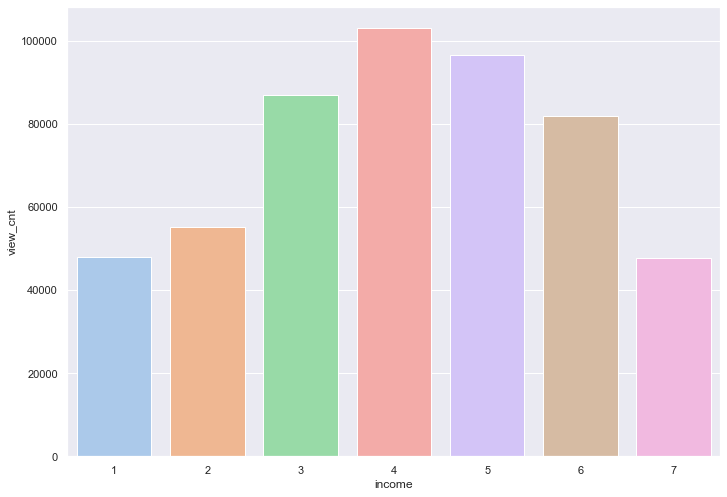

In [72]:
# 시각화 - 가구소득에 따른 view_cnt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= income_by_view_cnt,
    x= "income",
    y= "view_cnt"
)

#### 종사상지위에 따른 view_cnt

- 종사상지위에 따라 임금. 봉급 근로자가 가장 높게 나타남
- 그 다음으로는 해당없음(무직), 고용원이 없는 자영자로 나타남
- 고용원을 둔 사업자, 무급가족종사자가 가장 낮게 나타났으며 둘의 차이는 약 2000 정도 됨

In [73]:
# 종사상지위에 따른 view cnt
work_by_view_cnt = CS.groupby(['work'], as_index=False)['view_cnt'].sum() #as_index = False로 설정해 각 컬럼 그대로 유지
work_by_view_cnt

,work,view_cnt
0,1,212409
1,2,15571
2,3,99481
3,4,13192
4,5,178216


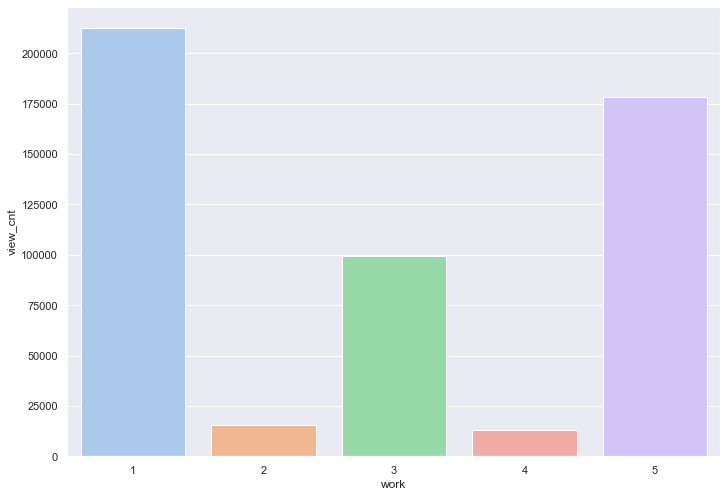

In [74]:
# 시각화 - 가구소득에 따른 view_cnt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_palette("pastel")
sns.barplot(
    data= work_by_view_cnt,
    x= "work",
    y= "view_cnt"
)

### 연령, 성별 boxplot

#### 연령

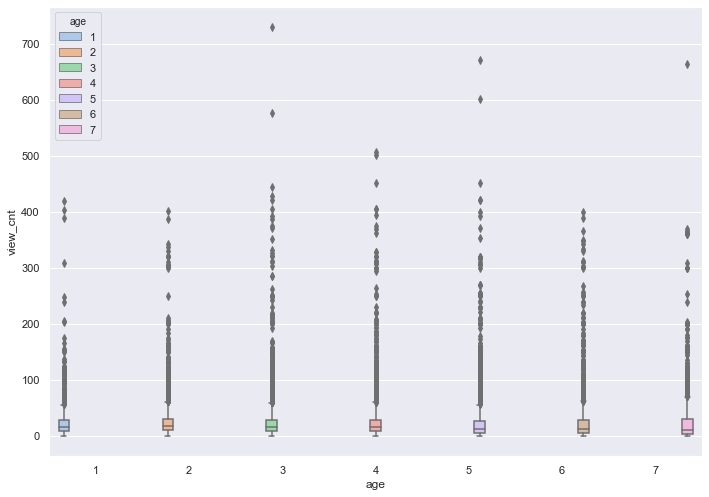

In [75]:
sns.boxplot(x = "age", y = "view_cnt", hue="age", data = CS)

#### 성별

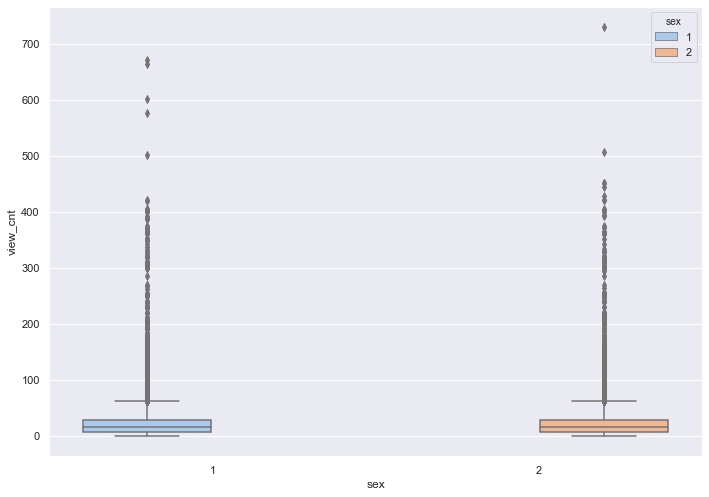

In [76]:
sns.boxplot(x = "sex", y = "view_cnt", hue="sex", data = CS)